<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝 종류 - 사람의 감독 하에 훈련하는 것인지 아닌지 분류
* 지도 학습(Supervised Learning) : 레이블(타겟)이 있는 데이터를 학습.
    * 분류(classification) : 클래스들을 분류.
    * 회귀(regression) : 숫자 예측
* 비지도 학습(Unsupervised Learning) : 레이블(타겟)이 없는 데이터를 학습.
    * 군집(clustering)
    * 시각화(visualization)
    * 이상치(outlier) 탐지
* 준지도 학습(semi-supervised learning) : 비지도 학습 + 전문가 시스템
    * 소량의 라벨이 있는 데이터와 대량의 라벨이 없는 데이터를 함께 활용해서 학습하는 방법
    * 사진 이미지 데이터를 학습할 때(선글라스 착용) 추후 선글라스 부분의 이미지를 예측하는 것.
    * 배웠던 부분은 전문가의 수준.
    * 라벨이 적은 상황에서도 높은 정확도를 내어 성능 향상에 도움이 됨.
    * 이미지 분류, 음성 인식(유튜브 자막 자동 생성), 자연어 처리(뉴스 분류, 감성 분석)에 활용 가능
* 강화 학습(reinforcement learning) : 보상과 벌칙을 통해서 학습.

# 문제

fish 데이터셋에서 물고기의 무게를 예측.
* Perch(농어)의 무게(Weight)를 길이(Length) 특성만으로 예측.
    * Weight(관심 변수, 레이블 ,타겟) ~ Length(독립 변수, 특성)
    * KNN, Linear Regression
* Perch의 무게를 다른 4개의 특성들로 예측.
    * Weight ~ Length + Diagonal + Height + Width
    * Linear Regression

# Imports

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor   # KNN을 이용한 숫자 예측 알고리즘.
from sklearn.linear_model import LinearRegression   # 선형 회귀를 이용한 숫자 예측 알고리즘.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # 회귀 평가 지표들.
from sklearn.preprocessing import PolynomialFeatures    # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline   # 변환기와 추정기를 연결해서 추정기 역할을 하는 클래스.

# 데이터 준비

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [5]:
perch = fish[fish.Species == 'Perch']

In [6]:
pd.options.display.max_rows = 10

In [7]:
perch   # 총 56 rows

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415
...,...,...,...,...,...,...
123,Perch,1100.0,42.0,44.6,12.8002,6.8684
124,Perch,1000.0,43.0,45.2,11.9328,7.2772
125,Perch,1100.0,43.0,45.5,12.5125,7.4165
126,Perch,1000.0,43.5,46.0,12.6040,8.1420


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
* 특성(feature) : Length -> 2차원 배열
* 레이블(label), 타겟(target) : Weight -> 1차원 배열

In [8]:
# 특성 배열 - (samples, features) shape의 2차원 배열
X = perch[['Length']].values

In [9]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [10]:
X.shape   #> 샘플 개수 : 56, 특성 개수 : 1개, 2차원 배열

(56, 1)

In [11]:
# 타겟 배열 - (samples, )   shape의 1차원 배열
y = perch['Weight'].values.copy()   # 원본을 변경하지 않은 상태로 남기려고.

In [12]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [13]:
y.shape  # 1차원 배열

(56,)

# train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
56 * 0.25

14.0

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

In [17]:
# y(Weight) ~ X(Length) 산점도 시각화. 훈련 셋/ 테스트 셋 구분.

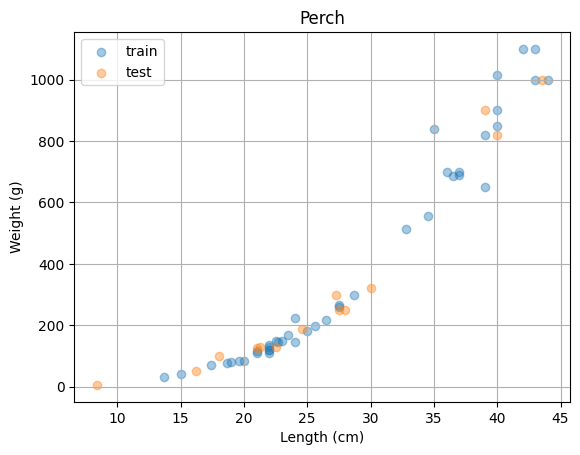

In [18]:
plt.scatter(x=X_train, y=y_train, label='train', alpha=0.4)
plt.scatter(x=X_test, y=y_test, label='test', alpha=0.4)

plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.legend()
plt.show()

# KNN 모델 훈련, 평가

KNN(K-Nearest Neighbors) Regressor : 가장 가까운 k개의 이웃들의 레이블(타겟) 평균 값으로 숫자를 예측하는 모델.

In [19]:
knn = KNeighborsRegressor()     # 모델 생성

In [20]:
knn.fit(X_train, y_train)       # 모델 훈련

KNeighborsRegressor()

In [21]:
train_pred = knn.predict(X_train)   # 훈련 셋의 예측값  - 예측한 무게

In [22]:
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [23]:
y_train # 실제값 - 실제 무게

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [24]:
test_pred = knn.predict(X_test) # 테스트 셋의 예측값

In [25]:
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [26]:
y_test  # 테스트 셋의 실제값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

# 회귀 모델의 평가 지표(metrics)

* MSE(Mean Squared Errors) : 오차들의 제곱의 평균.
* RMSE(Root Mean Squared Errors) : MSE의 제곱근.
* MAE(Mean Absolute Errors) : 오차들의 절대값의 평균.
* MSE, RMSE, MAE는 값이 작을 수록 좋은 점수. 값이 클 수록 나쁜 점수!
    * 일반적인 평가지표들은 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    * 회귀 문제에서도 오차들이 작을 수록 점수가 커지는 평가지표를 개발 -> R2 score.

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}}
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [27]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)

3716.5161904761903

In [28]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_train, train_pred))    # 60 정도의 평균적인 오차 발생

np.float64(60.96323638453089)

In [29]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)    # 평균적으로 35g정도의 오차 존재.

35.76190476190476

In [30]:
# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

721.7385714285714

In [31]:
# 테스트 셋의 MAE
mean_absolute_error(y_test, test_pred)

19.157142857142862

테스트 셋에서의 평가 점수가 훈련 셋에서의 평가 점수보다 더 좋음 -> 과소적합(underfitting)

In [32]:
# 훈련 셋 결정 계수(r2 score)
r2_score(y_train, train_pred)

0.9698823289099254

In [33]:
# 테스트 셋 결정 계수
r2_score(y_test, test_pred)     # 과소적합이 확인됨.

0.992809406101064

# KNN Regressor 문제점

outlier가 있는 경우 오차가 커질 수 있음.

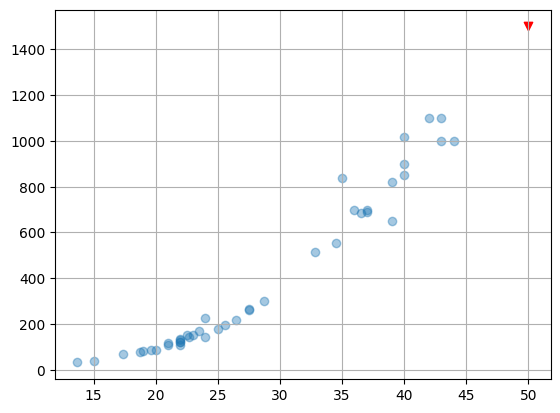

In [34]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, alpha=0.4)

# 가상의 물고기(50cm, 1500g)
plt.scatter(50, 1500, color='red', marker='v')

plt.grid()
plt.show()

In [35]:
# 길이 50cm인 물고기의 무게 예측값.
prediction = knn.predict([[50]])    # 2d array로 값을 줘야 예측값이 산출됨.

In [36]:
prediction

array([1010.])

In [37]:
indices = knn.kneighbors([[50]], return_distance=False)

In [38]:
indices # 가상의 물고기와 가장 가까운 훈련 셋 샘플의 인덱스 5개

array([[34, 14,  8, 40,  6]])

In [39]:
y_train[indices[0]] # 가장 가까운 5개 샘플의 레이블(무게)

array([1000., 1100., 1000., 1100.,  850.])

In [40]:
(1000 + 1100 + 1000 + 1100 + 850) / 5

1010.0

머신 러닝의 종류 - 단순하게 알고 있는 데이터 포인트와 새 데이터 포인트를 비교하는 것인지, 아니면 훈련 셋에서 특정한 패턴을(공식 발견) 발견하거나 예측 모델을 만드는지
* 사례 기반 머신러닝
    * 수학적인 모델을 만들지 않고, 훈련 셋의 특성들을 이용해서 예측.
    * outlier들이 많은 경우에는 성능이 떨어질 수 있음.
    * 예 : KNN
* 모델 기반 머신러닝
    * 훈련 셋에서 수학적인 모델을 만들고, 그 수학 모델로 예측하는 알고리즘
    * 선형 회귀(Linear Regression)

# Linear Regression

In [42]:
lin_reg = LinearRegression()    # 선형 회귀 모델 생성

In [43]:
lin_reg.fit(X_train, y_train)   # 선형 회귀 모델 훈련 - MSE를 최소화하는 직선의 방정식을 찾는 과정.

LinearRegression()

In [48]:
lin_reg.coef_   # 계수 (a기울기) = 39x, 선형 회귀식 y = ax + b 에서 독립변수 x의 계수(직선의 기울기)

array([39.01714496])

In [46]:
lin_reg.intercept_  # y절편, 선형 회귀식 y = ax + b 에서 y 절편 b

np.float64(-709.0186449535477)

In [47]:
# y = 39x - 709 공식을 얻음

In [49]:
train_pred = lin_reg.predict(X_train)

In [50]:
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [51]:
X_train @ lin_reg.coef_ + lin_reg.intercept_    # y = X @ a + b

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [52]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)     # MSE는 KNN의 MSE보다 큼.

7422.953552609781

In [53]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(86.1565641875869)

In [56]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)   # 결정계수는 KNN의 결정계수보다 작음.

0.939846333997604

In [57]:
# 테스트 세트의 예측값
test_pred = lin_reg.predict(X_test)

# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

17590.265977889187

In [59]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)     #> KNN 결정계수보다 작음.

0.8247503123313558

Linear Regression 모델의 결과를 보면, 훈련 셋의 평가 점수(MSE, R2)가 테스트 셋의 평가 점수보다 좋음. -> 과적합(overfitting)

In [60]:
# 훈련 셋 무게~길이 산점도
# 테스트 셋 무게~길이 산점도
# 선형 회귀 직선 선그래프

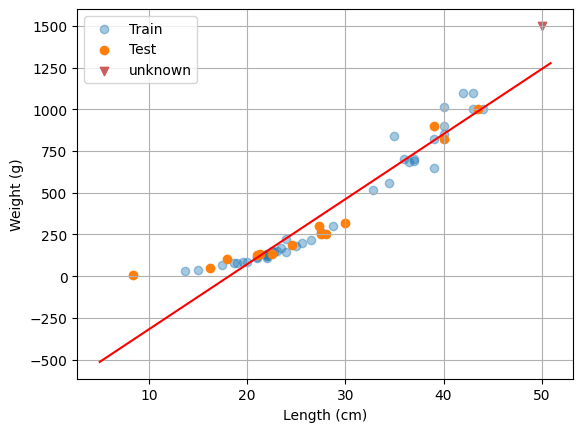

In [78]:
plt.scatter(X_train, y_train, label='Train', alpha=0.4)
plt.scatter(X_test, y_test, label='Test')
plt.scatter(50, 1500, marker='v', color='IndianRed', label='unknown')
# 선형 회귀 직선 선 그래프
x = np.arange(5, 51, 0.1).reshape((-1, 1))
y_hat = x @ lin_reg.coef_ + lin_reg.intercept_      # (n, 1) @ (1,) -> (n,)
plt.plot(x, y_hat, 'r-')

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# 다항 회귀

2차항을 포함하는 선형 회귀

In [81]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [82]:
X_train_poly = np.c_[X_train ** 2, X_train]

In [83]:
X_train_poly.shape

(42, 2)

In [85]:
X_train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [86]:
lin_reg = LinearRegression()    # 모델 생성

In [88]:
lin_reg.fit(X_train_poly, y_train)  # 모델 훈련 -> y = ax^2 + bx + c 함수의 계수 a,b 와 절편 c를 찾음.

LinearRegression()

In [89]:
lin_reg.coef_   # (2,) shape의 1차원 배열 <- 특성이 2개(x^2, x)이기 때문에

array([  1.01433211, -21.55792498])

In [90]:
lin_reg.intercept_

np.float64(116.0502107827827)

In [91]:
X_train_poly @ lin_reg.coef_ + lin_reg.intercept_       # 예측값을 찾는 과정. y = ax^2 + bx + c
# (42, 2) @ (2,) -> (42,)
# (42,) + scalar -> (42,)

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [95]:
train_pred = lin_reg.predict(X_train_poly)  # 훈련 셋의 예측값

In [96]:
train_pred

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [97]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)

0.9706807451768623

In [99]:
# 2차항을 포함하는 테스트 셋
X_test_poly = np.c_[X_test ** 2, X_test]

In [100]:
X_test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [101]:
test_pred = lin_reg.predict(X_test_poly)    # 테스트 셋의 예측값

In [102]:
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [103]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)

0.9775935108325122

In [104]:
# 훈련 셋 산점도
# 테스트 셋 산점도
# 선형회귀 2차 함수 선그래프

In [113]:
lin_reg.coef_

array([  1.01433211, -21.55792498])

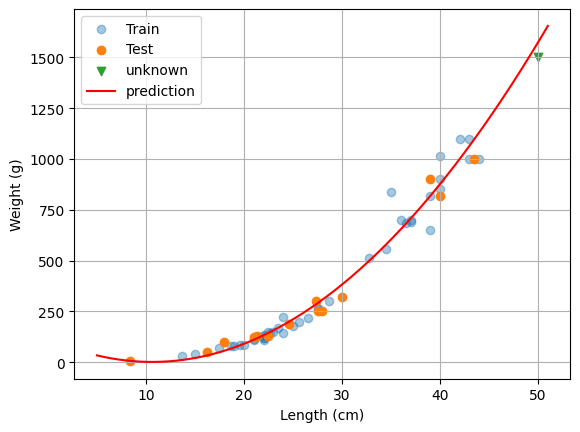

In [119]:
plt.scatter(X_train, y_train, label='Train', alpha=0.4)
plt.scatter(X_test, y_test, label='Test')
plt.scatter(50, 1500, label='unknown', marker='v')
# 선형회귀 2차 함수 선 그래프
x_list = np.arange(5, 51, 0.001).reshape((-1, ))
X_train_poly = np.c_[x_list ** 2, x_list]       # ???
y_hat = X_train_poly @ lin_reg.coef_ + lin_reg.intercept_   # x^2 * a + x * b + c
plt.plot(x_list, y_hat, 'r-', label='Regression')


plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

# Pipeline

Pipeline : PolynomialFeatures + LinearRegression

scikit-learn 클래스 설계 철학
* 변환기(Transformer)
    * `fit`, `fit_transform`, `transform` 메서드들을 가지고 있음.
    * 데이터 전처리(preprocessing) 과정에서 주로 사용.
    * 예 : StandardScaler, MinMaxScaler, PolynomialFeatures, ...
* 추정기(Estimator)
    * `fit`, `predict`, `score` 메서드들을 가지고 있음.
    * ML 알고리즘들을 구현한 클래스.
    * KNeighborsClassifier, KNeighborsRegressor, LinearRegression, ...

In [122]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [129]:
poly = PolynomialFeatures(degree=3, include_bias=False)   # 변환기 객체 생성, degree : 차수 설정
result = poly.fit_transform(X_train)    # 변환기를 사용해서 훈련 셋을 변환
print(poly.get_feature_names_out())     # 차수의 순서를 알려줌??
print(result.shape)     # x, x^2 형태
print(result[:5, :])

['x0' 'x0^2' 'x0^3']
(42, 3)
[[1.960000e+01 3.841600e+02 7.529536e+03]
 [2.200000e+01 4.840000e+02 1.064800e+04]
 [1.870000e+01 3.496900e+02 6.539203e+03]
 [1.740000e+01 3.027600e+02 5.268024e+03]
 [3.600000e+01 1.296000e+03 4.665600e+04]]


In [130]:
# Pipeline으로 연결할 변환기 생성
poly = PolynomialFeatures(degree=2, include_bias=False)\

# Pipeline으로 연결한 추정기 생성
reg = LinearRegression()

# Pipeline 생성
model = Pipeline(steps = [('poly_features', poly), ('lin_reg', reg)])

In [131]:
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [132]:
# 모델 훈련(Pipeline.fit 메서드 호출) : (1) 변환기 fit_transform, (2) 추정기 fit
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [134]:
model['lin_reg'].coef_

array([-21.55792498,   1.01433211])

In [135]:
model['lin_reg'].intercept_

np.float64(116.05021078278395)

In [137]:
model.predict(X_train)   # 훈련 셋 예측값

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [138]:
model.predict(X_test)   # 테스트 셋 예측값

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

# Perch(농어)의 모든 특성(Length, Diagonal, Height, Width)을 사용한 무게 예측

* perch 데이터프레임에서 특성 배열(2차원) X, 타겟 배열(1차원) y을 생성.
* 훈련 셋/ 테스트 셋 분리
* KNN 모델 생성, 훈련, 예측, 평가
* LinearRegression 모델 생성, 훈련, 예측, 평가.
* PolynomialFeatures(degree=2), LinearRegression, Pipeline을 사용한 모델 생성, 예측, 평가

In [140]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


## 특성 배열, 타겟 배열 생성

In [142]:
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values

In [145]:
X.shape

(56, 4)

In [147]:
y = perch['Weight'].values

In [148]:
y.shape

(56,)

## 훈련 셋/ 테스트 셋 분리

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [150]:
X_train.shape, y_train.shape

((42, 4), (42,))

In [151]:
X_test.shape, y_test.shape

((14, 4), (14,))

## KNN 모델 생성, 훈련, 예측, 평가

In [177]:
knn = KNeighborsRegressor()    # KNN 모델 생성

In [178]:
knn.fit(X_train, y_train)   # 모델 훈련

KNeighborsRegressor()

In [179]:
train_pred = knn.predict(X_train)   # 모델 예측

In [180]:
train_pred

array([  87.6,  123. ,   79.6,   70.6,  723. ,  183.4,  847. ,  847. ,
       1020. ,  123. ,   95. ,  123. ,  174. ,  248. , 1043. ,  847. ,
        174. ,  122. ,  248. ,  847. ,  582. ,  224. ,  723. ,   60. ,
        142. ,   60. ,  685. ,  694.2,  248. ,  167. ,  847. ,  122. ,
        139. ,  123. , 1020. ,  136. ,   79.6,  685. ,  123. ,  193. ,
       1043. ,  659. ])

In [181]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [182]:
knn.score(X_train, y_train) # 모델 예측

0.97579760182756

In [183]:
mean_squared_error(y_train, train_pred)     # MSE 평가

2986.5723809523806

In [184]:
np.sqrt(mean_squared_error(y_train, train_pred))    # 54

np.float64(54.64954145235237)

In [185]:
r2_score(y_train, train_pred)       # 0.97

0.97579760182756

In [186]:
test_pred = knn.predict(X_test)
mean_squared_error(y_test, test_pred)       # MSE와 RMSE는 테스트셋이 훈련 셋보다 더 좋음. 과소적합 case

837.3100000000001

In [187]:
r2_score(y_test, test_pred)         # 0.99

0.9916579819676246

KNNRegressor에서 훈련 셋은 MSE: 2986, r^2 값 97 / 테스트 셋은 MSE: 837, r^2 값 99로 훈련 셋보다 테스트 셋의 결과가 더 좋게 나옵니다. 이는 과소적합으로 보여집니다.

## LinearRegression 모델 생성, 훈련, 예측, 평가.

In [188]:
lin_reg = LinearRegression()    # 선형 회귀 모델 생성

In [189]:
lin_reg.fit(X_train, y_train)   # 모델 훈련

LinearRegression()

In [190]:
train_pred = lin_reg.predict(X_train)   # 모델 예측

In [191]:
train_pred

array([  50.07831254,  149.63115115,   26.52323981,  -11.85322276,
        727.07849472,  216.11818851,  859.35210445,  894.24144157,
        883.76216601,  133.80604761,   30.46174313,  165.45625469,
        267.36647321,  302.42993565,  942.06583292,  859.73196835,
        209.15316045,  137.18128947,  294.64533152,  907.16858502,
        585.54863062,  292.8893912 ,  763.11655759, -149.53132283,
        163.94525857, -104.38889956,  718.95576629,  815.95759166,
        350.34538816,  195.07245372,  764.17125484,  130.77848264,
        116.61555757,  142.50754589,  959.21205119,  218.69399647,
         79.52715018,  737.86169572,  161.30274218,  243.72987423,
        939.22223984,  665.0680958 ])

In [192]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [193]:
lin_reg.score(X_train, y_train)     # 모델 예측.

0.9567246116638569

In [194]:
mean_squared_error(y_train, train_pred)     # 훈련 셋 MSE

5340.176566753986

In [195]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(73.07651173088372)

In [196]:
r2_score(y_train, train_pred)   # 0.95

0.9567246116638569

In [198]:
test_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, test_pred)

12140.410523504848

In [199]:
r2_score(y_test, test_pred)     # 0.87

0.8790465615990273

선형회귀분석의 훈련 셋 결과는 MSE: 5340, r^2 값 95 / 테스트 셋 결과는 MSE: 12140, r^2 값 87로 훈련 셋의 결과가 더 좋게 나오므로 이는 과대적합으로 보여집니다.

## PolynomialFeatures(degree=2), LinearRegression, Pipeline 을 사용한 모델 생성, 예측, 평가

In [200]:
poly = PolynomialFeatures(degree=2, include_bias=False) # poly 모델 생성

In [201]:
lin = LinearRegression()    # 추정기 생성

In [202]:
model = Pipeline([('poly_features', poly), ('Linear_Reg', lin)])

In [203]:
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('Linear_Reg', LinearRegression())])

In [204]:
model.fit(X_train, y_train)     # 모델 훈련

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('Linear_Reg', LinearRegression())])

In [205]:
model['Linear_Reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [206]:
model['Linear_Reg'].intercept_

np.float64(67.36628210104692)

In [212]:
train_pred = model.predict(X_train)  # 훈련 셋 예측값

In [213]:
test_pred = model.predict(X_test)   # 테스트 셋 예측값

In [214]:
mean_squared_error(y_train, train_pred) # 훈련 셋 MSE

986.5134830825882

In [217]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(31.40881218834275)

In [218]:
r2_score(y_train, train_pred)       # 0.99

0.9920055538341142

In [219]:
mean_squared_error(y_test, test_pred)   # 테스트 셋 MSE

5092.809112552995

In [220]:
r2_score(y_test, test_pred)     # 0.94

0.949260960155303

pipeline 모델에서 훈련 셋은 MSE : 986, r^2 값은 0.99 / 테스트 셋의 MSE : 5092, r^2 값은 0.94로 훈련 세트의 값이 더 잘나오며 이는 과대적합의 영향이 있음을 보여줍니다.